In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, date
%matplotlib inline

In [2]:
cab = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('city.csv')
customer = pd.read_csv('Customer_ID.csv')
transaction = pd.read_csv('Transaction_ID.csv')

### Checking Data

In [3]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
cab.isnull().sum() ##checking if there is any NA value

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [5]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [6]:
cab.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [7]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [8]:
city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [9]:
city.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [10]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [11]:
customer.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [12]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [13]:
customer.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [14]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [15]:
transaction.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [16]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [17]:
transaction.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [18]:
cab['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [19]:
city['States'] = city['City'].apply(lambda x: str(x).split().pop(-1))

In [20]:
city['States'] = city['States'].replace(['VALLEY', 'COUNTY'], ['CA', 'CA'])

In [21]:
city['States'].unique()

array(['NY', 'IL', 'CA', 'FL', 'AZ', 'TX', 'GA', 'CO', 'WA', 'PA', 'DC',
       'TN', 'MA'], dtype=object)

In [22]:
cab_df = pd.merge(left = cab, right = city, how = 'inner', on = 'City')
cab_df.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,States
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",GA
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",GA
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,"814,885","24,701",GA
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,"814,885","24,701",GA
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,"814,885","24,701",GA
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.0240,"814,885","24,701",GA
6,10000384,42371,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,"814,885","24,701",GA
7,10000385,42378,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,"814,885","24,701",GA
8,10000386,42372,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,"814,885","24,701",GA
9,10000387,42375,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,"814,885","24,701",GA


In [23]:
### Create final_cab data
final_cab = pd.merge(left = cab_df, right = transaction, how ='inner', on = 'Transaction ID')
final_cab = pd.merge(left = final_cab, right = customer, how = 'inner', on = 'Customer ID')

In [24]:
min(final_cab['Date of Travel']) ## This value responds for 01/01/2016. 

42371

In [25]:
def date_converter(num):
    if num == 42371:
        return datetime.strptime('2016/01/01', '%Y/%m/%d')
    else:
        diff = num - 42371
        return datetime.strptime('2016/01/01', '%Y/%m/%d') + timedelta(days=diff)  
final_cab['Travel Date'] = [date_converter(i) for i in final_cab['Date of Travel']]
final_cab.drop(['Date of Travel'], axis = 1, inplace = True)


In [26]:
final_cab.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,States,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Travel Date
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",GA,29290,Card,Male,28,10813,2016-01-07
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",GA,29290,Cash,Male,28,10813,2018-07-20
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",GA,29290,Card,Male,28,10813,2018-11-22
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",GA,27703,Card,Male,27,9237,2016-01-05
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",GA,27703,Card,Male,27,9237,2018-04-20


In [27]:
max(final_cab['Travel Date'])

Timestamp('2018-12-30 00:00:00')

In [28]:
unused_date = pd.date_range(datetime.strptime('2016/1/1',"%Y/%m/%d"), periods=30).tolist()
final_cab.drop(final_cab[final_cab['Travel Date'].isin(unused_date)].index, inplace = True)

# EDA

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

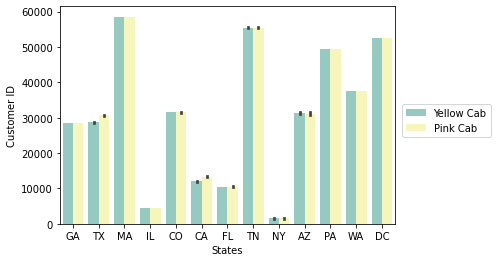

In [29]:
## Numbers of users using the company's cab in different city:
sns.set_palette("Set3")
sns.barplot(data = final_cab, x = "States", y = "Customer ID", hue = "Company")
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)
plt.plot

We can see that, for different states, Pink Cab and Yellow Cab have similar amount of users. However, for some states that have small differences, it seems like there would be more people choosing to use Pink Cab over Yellow cab.

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

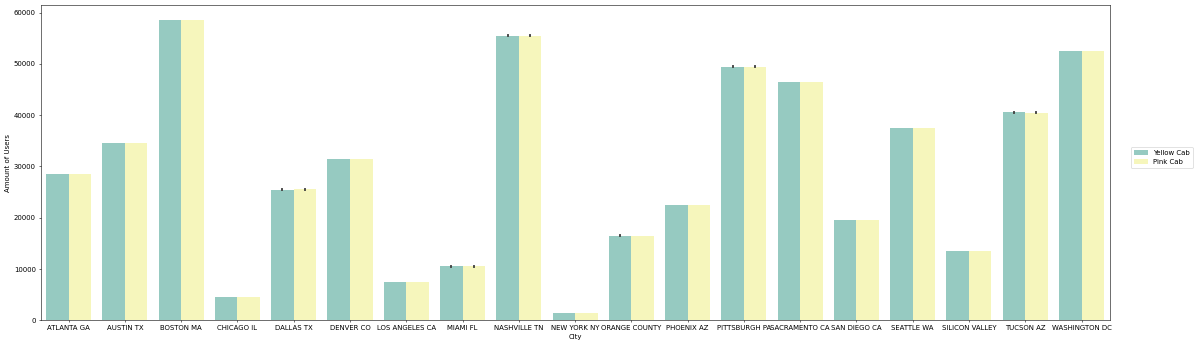

In [30]:
sns.set_palette("Set3")
fig = plt.figure(figsize=(24, 7), dpi=50)
ax = sns.barplot(data = final_cab, x = "City", y = "Customer ID", hue = "Company")
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)
ax.set(xlabel ='City', ylabel = 'Amount of Users')
plt.tight_layout()
plt.plot

When investigating the amount of users that use cabs from two companies across the cities, we can both see that they both have similar of amount of users. 

### Profit Analysis:

In [31]:
final_cab['Profit'] = final_cab['Price Charged'] - final_cab['Cost of Trip']
final_cab['Year'] = pd.to_datetime(final_cab['Travel Date']).apply(lambda x: x.year)
final_cab['Month'] = pd.to_datetime(final_cab['Travel Date']).apply(lambda x: x.month)
final_cab.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,States,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Travel Date,Profit,Year,Month
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",GA,29290,Cash,Male,28,10813,2018-07-20,281.2772,2018,7
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",GA,29290,Card,Male,28,10813,2018-11-22,194.6480,2018,11
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",GA,27703,Card,Male,27,9237,2018-04-20,253.9808,2018,4
5,10324737,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,"814,885","24,701",GA,27703,Cash,Male,27,9237,2018-05-03,50.8912,2018,5
6,10395626,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,"814,885","24,701",GA,27703,Card,Male,27,9237,2018-10-26,25.0960,2018,10


In [32]:
pink_cab = final_cab[final_cab['Company'] == 'Pink Cab']
yellow_cab = final_cab[final_cab['Company'] == 'Yellow Cab']

In [33]:
year = [2016, 2017, 2018]
pink_year_profit = [sum(pink_cab[pink_cab['Year'] == i]['Profit']) for i in year]
yellow_year_profit = [sum(yellow_cab[yellow_cab['Year'] == i]['Profit']) for i in year]
total_profit = pink_year_profit + yellow_year_profit

In [34]:
profit = pd.DataFrame({'Company': ['Pink Cab',  'Pink Cab', 'Pink Cab', 'Yellow Cab', 'Yellow Cab', 'Yellow Cab',],
         'Year': [2016,  2017,  2018, 2016,  2017,  2018], 
         'Total Profit': total_profit})
profit.head()


,Company,Year,Total Profit
0,Pink Cab,2016,1.665930e+06
1,Pink Cab,2017,2.015101e+06
2,Pink Cab,2018,1.552345e+06
3,Yellow Cab,2016,1.323758e+07
4,Yellow Cab,2017,1.646427e+07


[]

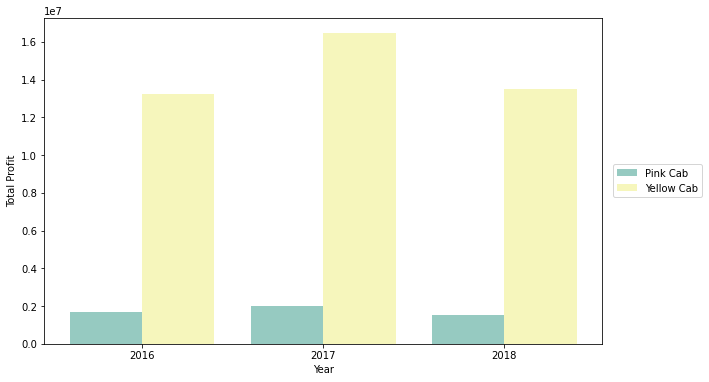

In [35]:
sns.set_palette("Set3")
fig = plt.figure(figsize=(10, 6))
sns.barplot(data = profit, x = "Year", y = "Total Profit", hue = "Company")
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)
plt.plot()

In [36]:
def month_profit(data, year:int, month:int):
        month_profit = sum(data[(data['Year'] == year) & (data['Month'] == month)]['Profit'])
        return month_profit

In [37]:
def monthly_profit(data, year_array, month_array):
    ym = np.array(np.meshgrid(year_array, month_array)).T.reshape(-1, 2)
    monthly_profit = []
    for i in range(0, len(ym)):
        monthly_profit.append(month_profit(data, ym[i][0], ym[i][1]))
    return monthly_profit


In [38]:
year = [2016, 2017, 2018]
month = [1,2,3,4,5,6,7,8,9,10,11,12]
pink_monthly_profit =  monthly_profit(pink_cab, year, month)
yellow_monthly_profit =  monthly_profit(yellow_cab, year, month)


In [39]:
monthlyprofit = pd.DataFrame({'Company': np.repeat('Pink Cab', len(pink_monthly_profit)).tolist() + np.repeat('Yellow Cab', len(yellow_monthly_profit)).tolist(),
         'Year': np.repeat(2016, 12).tolist() + np.repeat(2017, 12).tolist() +  np.repeat(2018, 12).tolist() + np.repeat(2016, 12).tolist() + np.repeat(2017, 12).tolist() +  np.repeat(2018, 12).tolist(), 
         'Month':  month + month + month + month + month + month,
         'Profit':  pink_monthly_profit + yellow_monthly_profit})

In [40]:
monthly_profit_2016 = monthlyprofit[monthlyprofit['Year'] == 2016]
monthly_profit_2017 = monthlyprofit[monthlyprofit['Year'] == 2017]
monthly_profit_2018 = monthlyprofit[monthlyprofit['Year'] == 2018]

[]

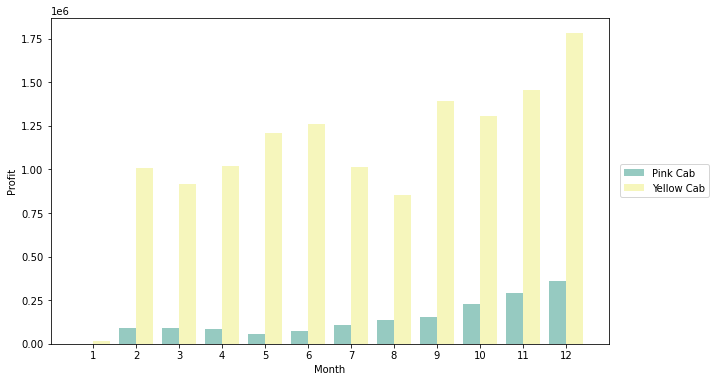

In [41]:
sns.set_palette("Set3")
fig = plt.figure(figsize=(10, 6))
sns.barplot(data = monthly_profit_2016, x = "Month", y = "Profit", hue = "Company")
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)
plt.plot()

[]

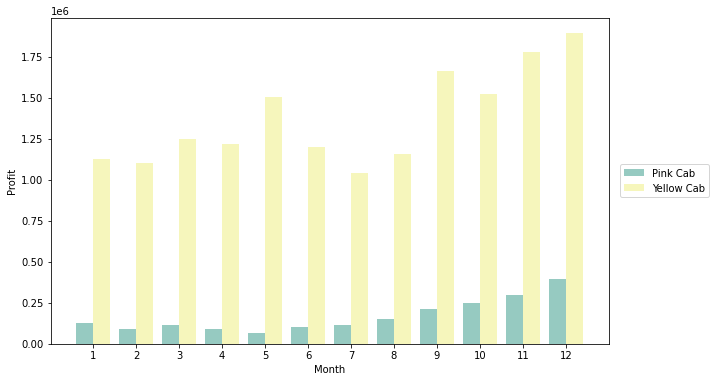

In [42]:
sns.set_palette("Set3")
fig = plt.figure(figsize=(10, 6))
sns.barplot(data = monthly_profit_2017, x = "Month", y = "Profit", hue = "Company")
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)
plt.plot()

[]

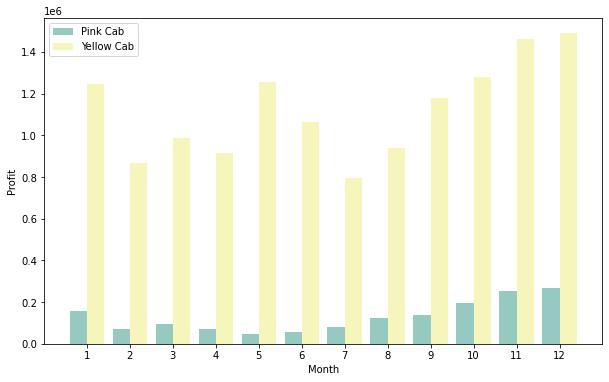

In [43]:
sns.set_palette("Set3")
fig = plt.figure(figsize=(10, 6))
sns.barplot(data = monthly_profit_2018, x = "Month", y = "Profit", hue = "Company")
plt.legend(loc = 0)
plt.plot()

In [44]:
def city_profit(data, city):
    profit = sum(data[data['City'] == city]['Profit'])
    return profit
def spatial_profit(data, city):
    spatial_profit = []
    for i in range(0, len(city)):
        spatial_profit.append(city_profit(data, city[i]))
    return spatial_profit

In [45]:
pink_spatial_profit = spatial_profit(pink_cab, pink_cab['City'].unique())
yellow_spatial_profit = spatial_profit(yellow_cab, yellow_cab['City'].unique())

In [46]:
spatialprofit = pd.DataFrame({'Company': np.repeat('Pink Cab', len(pink_spatial_profit)).tolist() + np.repeat('Yellow Cab', len(yellow_spatial_profit)).tolist(),
         'City': pink_cab['City'].unique().tolist() + yellow_cab['City'].unique().tolist(),
         'Profit':  pink_spatial_profit + yellow_spatial_profit})   

[]

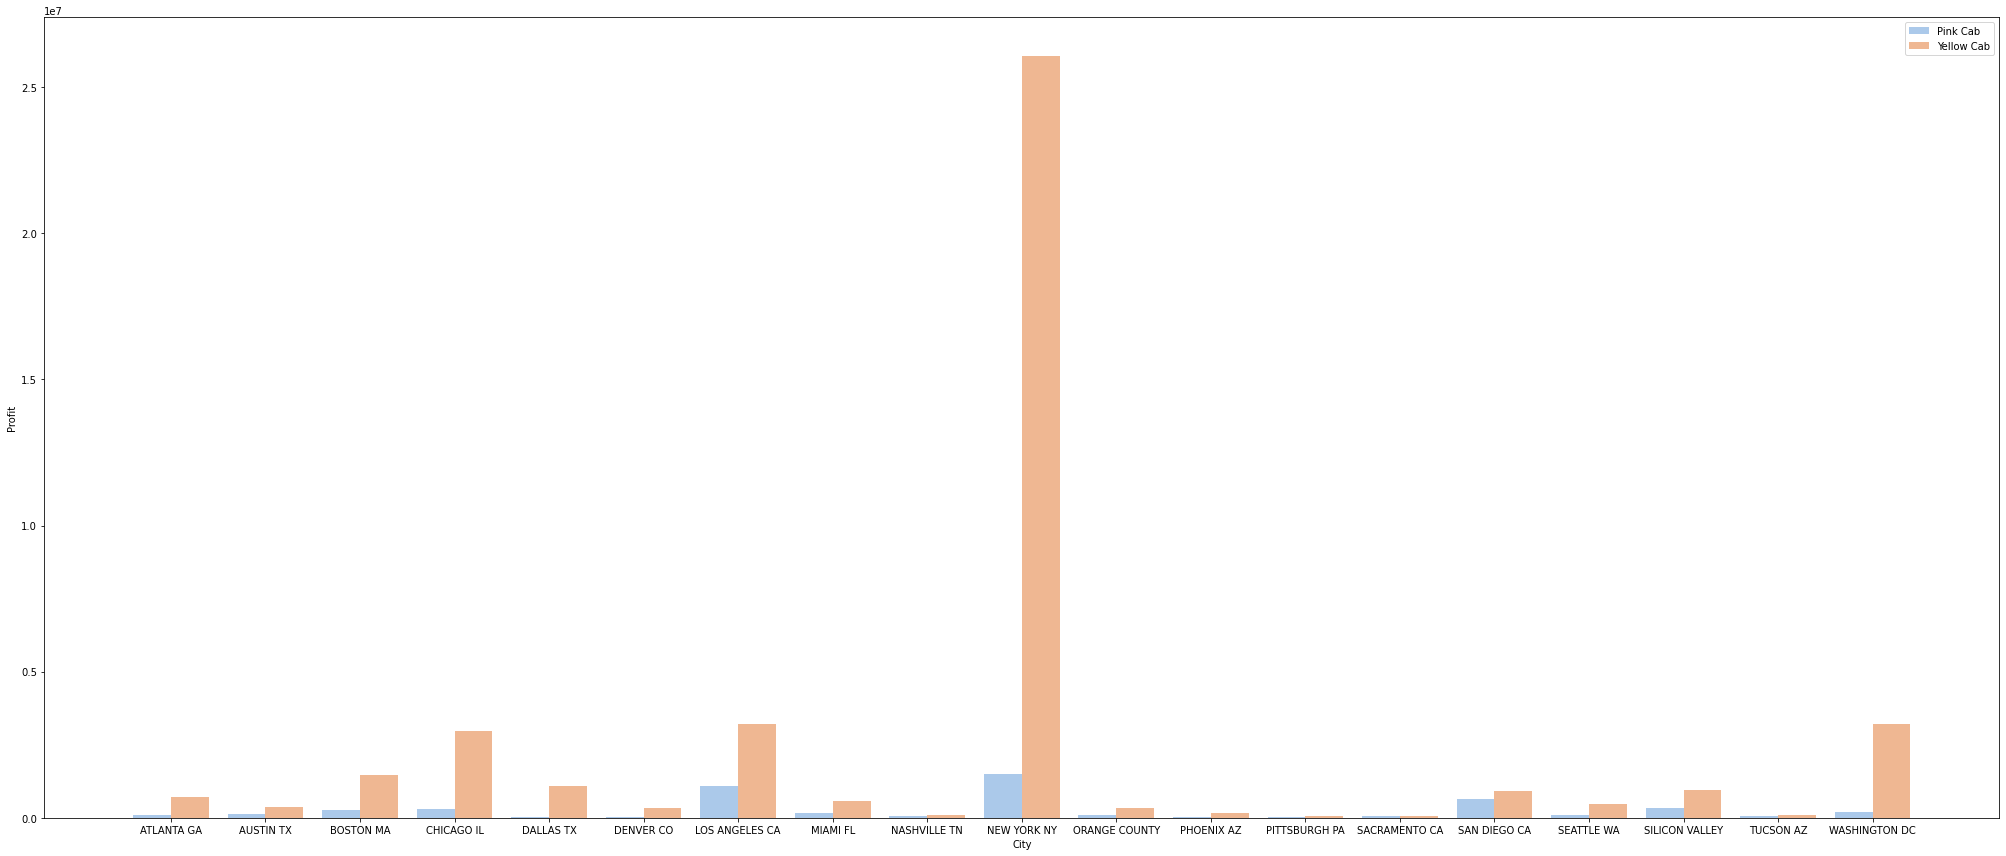

In [47]:
sns.set_palette("pastel")
fig = plt.figure(figsize=(28, 12))
sns.barplot(data = spatialprofit, x = "City", y = "Profit", hue = "Company")
plt.legend(loc= 0)
plt.tight_layout()
plt.plot()

In [48]:
pink_spatial_profit = spatialprofit[spatialprofit['Company'] == 'Pink Cab']
yellow_spatial_profit = spatialprofit[spatialprofit['Company'] == 'Yellow Cab']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]

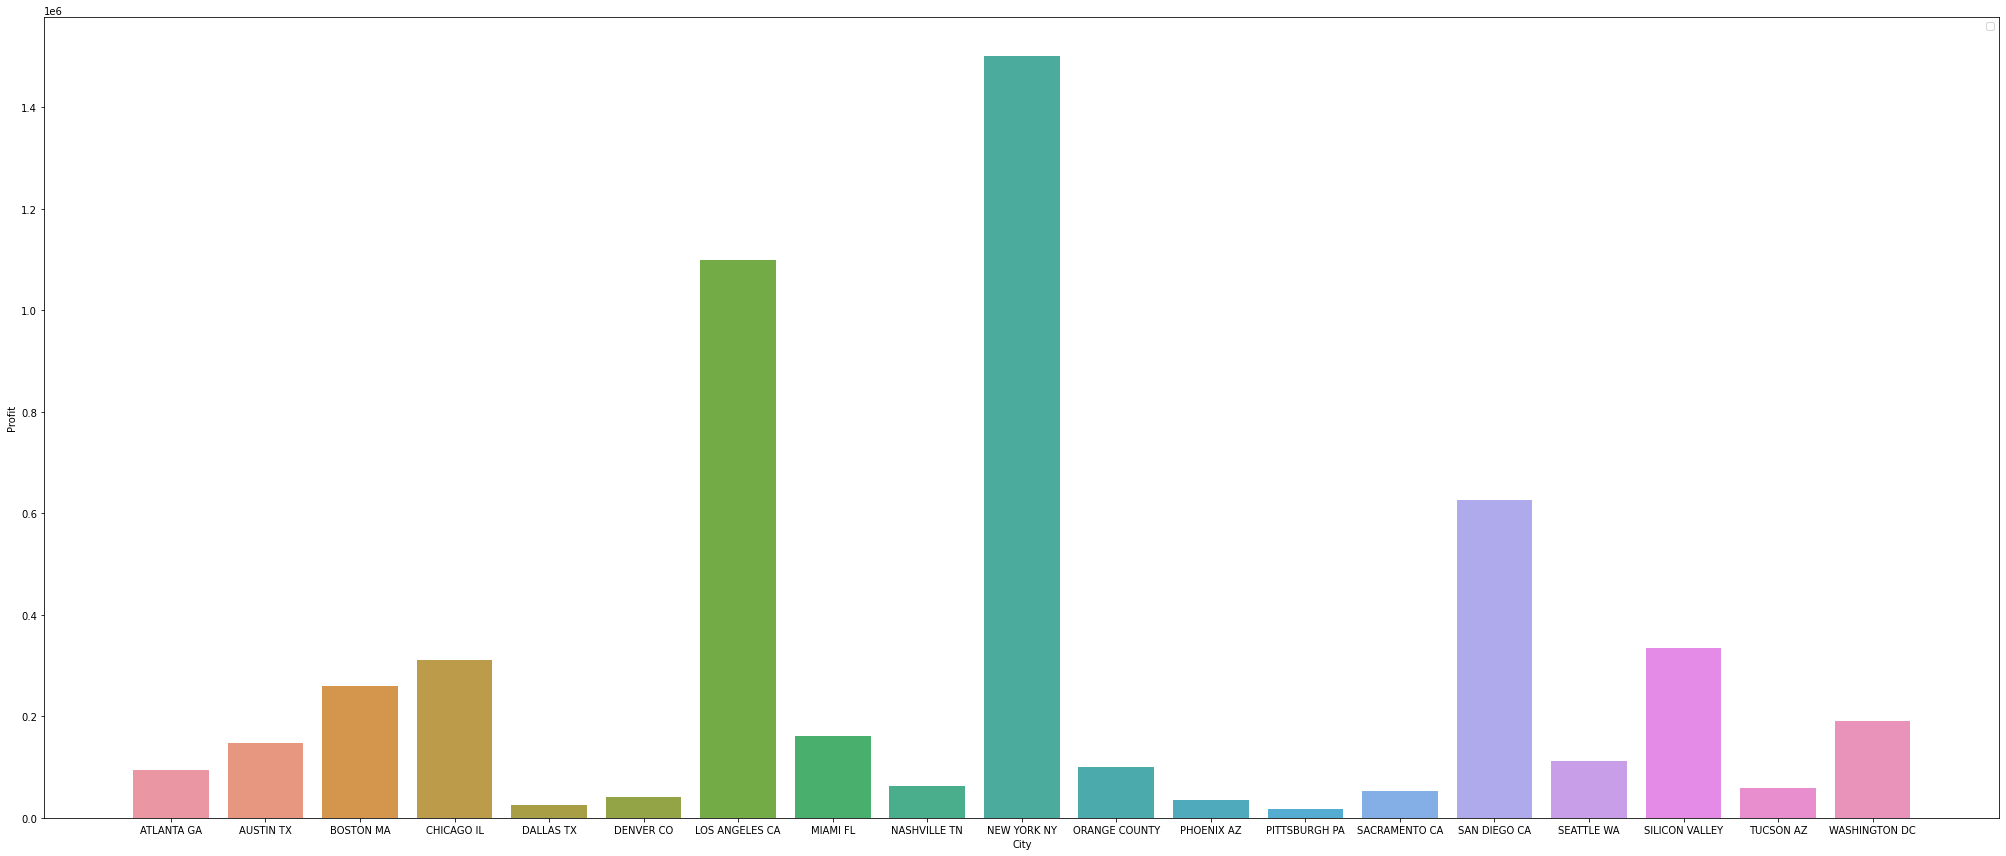

In [49]:
sns.set_palette("pastel")
fig = plt.figure(figsize=(28, 12))
sns.barplot(data = pink_spatial_profit, x = "City", y = "Profit")
plt.legend(loc= 0)
plt.tight_layout()
plt.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]

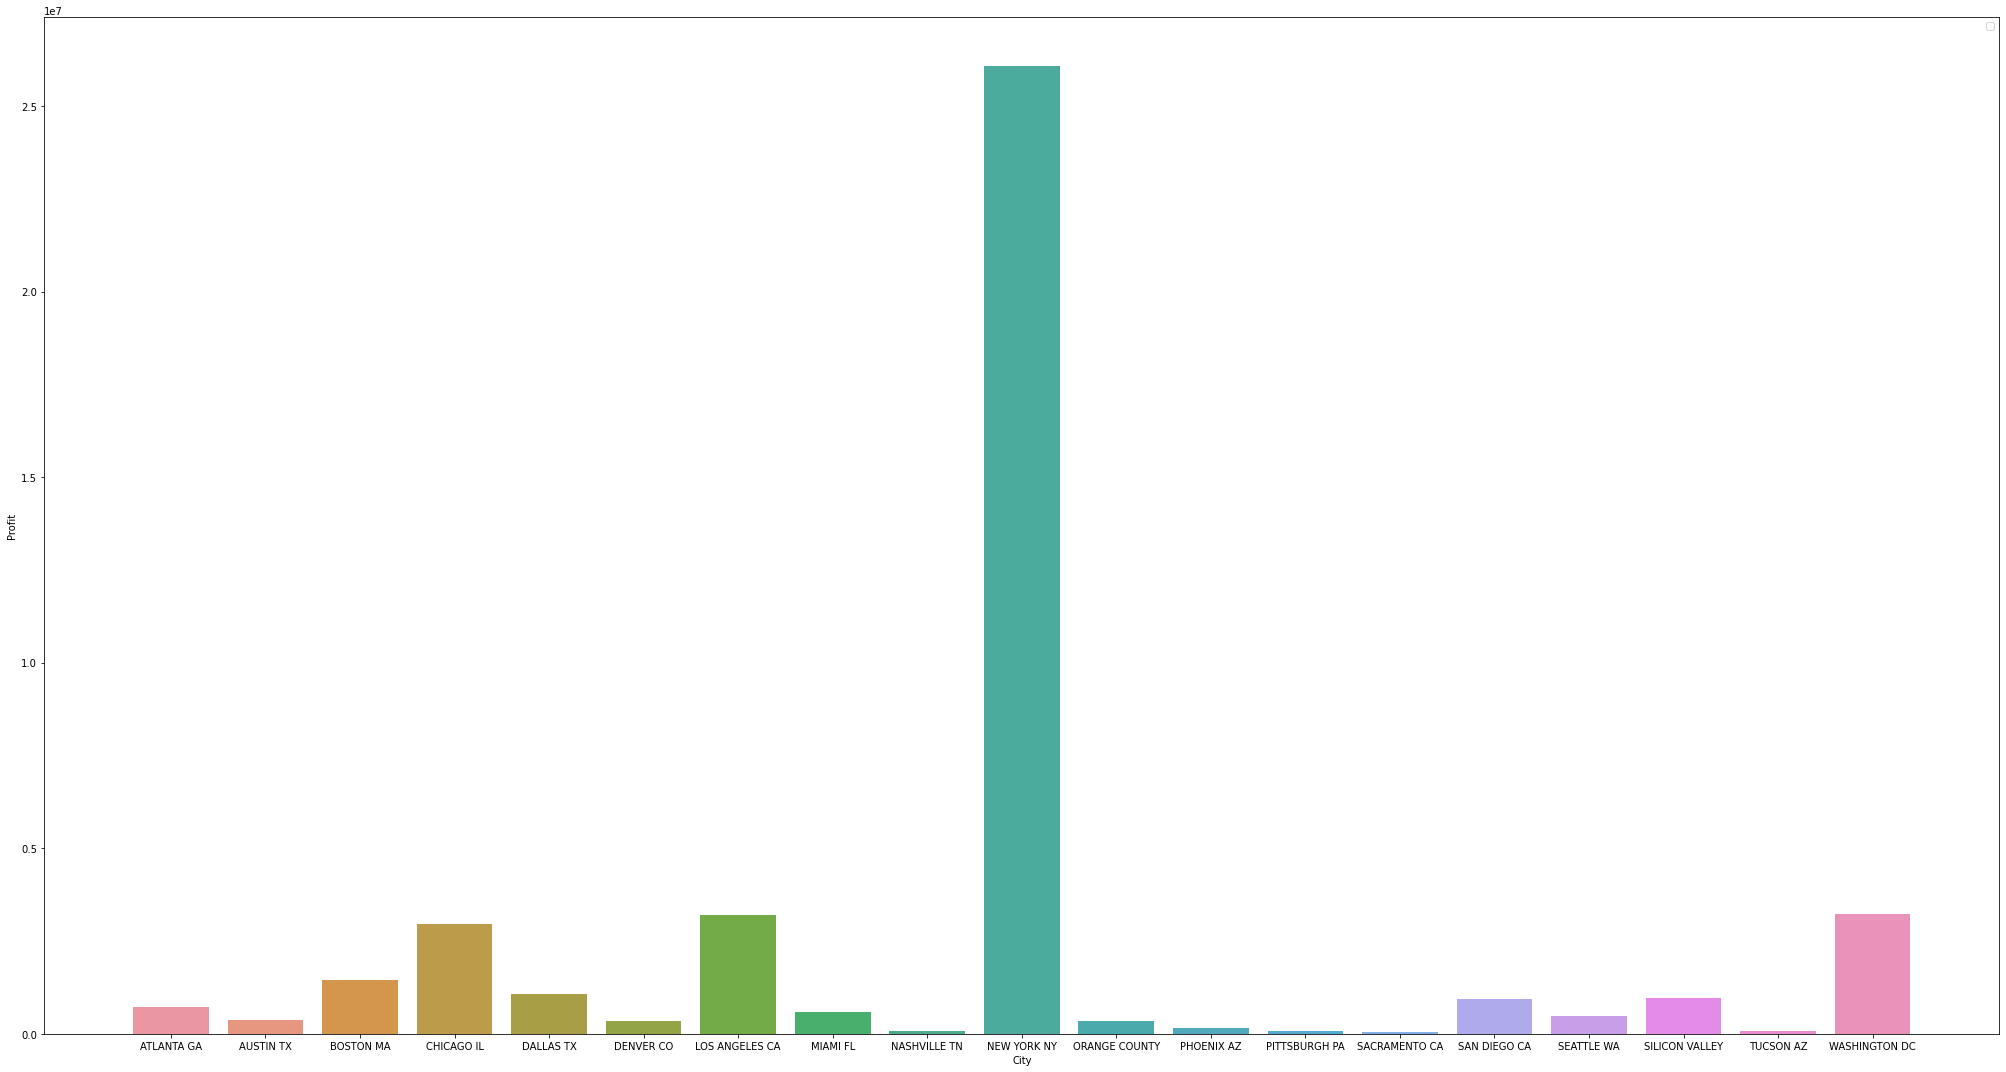

In [51]:
sns.set_palette("pastel")
fig = plt.figure(figsize=(28, 15))
sns.barplot(data = yellow_spatial_profit, x = "City", y = "Profit")
plt.legend(loc= 0)
plt.tight_layout()
plt.plot()